In [ ]:
#Importação da bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/amandacmelo/Projeto-Ciencia-de-Dados/main/dados_limpos.csv"
dados = pd.read_csv(url, sep=",")

dados.columns

Index(['Ano', 'CDMunicipio', 'Populacao', 'PessoalOcupado',
       'PessoalAssalariado', 'VrSalarios', 'PIB', 'QtEmpresas',
       'AreaPlantada_h', 'AreaColhida_h', 'VlProducaoAgricola',
       'VlProducaoPecuaria', 'Area', 'Importacoes_US$', 'Exportacoes_US$',
       'Receitas_R$', 'Transferencias_correntes_R$',
       'Transferencias_capital_R$', 'NrNascimentos', 'NrObitosInfantis',
       'povoamento', 'UF', 'Municipio', 'Regiao', 'PIB_PerCapita',
       'Densidade_Populacional', 'Proporcao_PessoalAssalariado',
       'Proporcao_Area_Plantada'],
      dtype='object')

# 📊 **Análise do impacto da atividade agrícola na vida da população local**

Este tópico apresenta a análise do impacto da produção agrícola na vida da população local.


Como ja é sabido, a atividade agrícola e pecuária é um dos pilares fundamentais da economia brasileira, especialmente em áreas rurais onde grande parte da população depende diretamente da agricultura para sua subsistência e qualidade de vida. Analisar o impacto da atividade agrícola na vida da população local é essencial para compreender como o setor influencia o desenvolvimento econômico, a geração de empregos e a melhoria das condições sociais dessas comunidades. Esse entendimento é crucial para a criação de políticas públicas que promovam a sustentabilidade, a inclusão social e o fortalecimento da economia regional, além de nos proporcionar análises de se tal cultura vem sendo importante no desenvolvimento regional.

Para esta análise, primeiramente foram utilizadas as colunas de Produção Agrícola, Produção Pecuária, Pessoal Assalariado e Valor de Exportação para investigar a relação entre essas atividades e o desenvolvimento da região. Para cada gráfico, filtrou-se os dados referentes apenas à região Centro-Oeste e, em seguida, os valores foram agrupados por ano, somando-se o total registrado (Produção Agrícola, Produção Pecuária, Pessoal Assalariado ou Valor de Exportação) em cada período.

Posteriormente, foi calculada a taxa de crescimento ano a ano, comparando o valor de cada ano com o do ano anterior e expressando essa variação em porcentagem.

Com essas informações, elaborou-se um gráfico com dois eixos:

- O gráfico de barras (em azul) apresenta o valor total de cada indicador ao longo dos anos.

- O gráfico de pontos (em vermelho) ilustra a variação percentual ano a ano, indicando o crescimento ou a queda em relação ao período anterior.

Além disso, adicionamos etiquetas com os valores percentuais de crescimento para facilitar a visualização dos dados.

Optou-se por focar na região Centro-Oeste do Brasil devido à sua forte representatividade na produção de insumos agrícolas e Pecuário, setores que se configuram como pilares da economia da maioria dos seus estados e municípios (1).

Dessa forma, conclui-se que o valor de exportação da região é fortemente influenciado pela produção agrícola, o que reforça a relevância desses dados para a análise proposta neste tópico.

**Referências:**

1- UNIDERP. Região Centro-Oeste: oportunidades e vida na região. Disponível em: https://blog.uniderp.com.br/regiao-centro-oeste/. Acesso em: 24 abr. 2025.


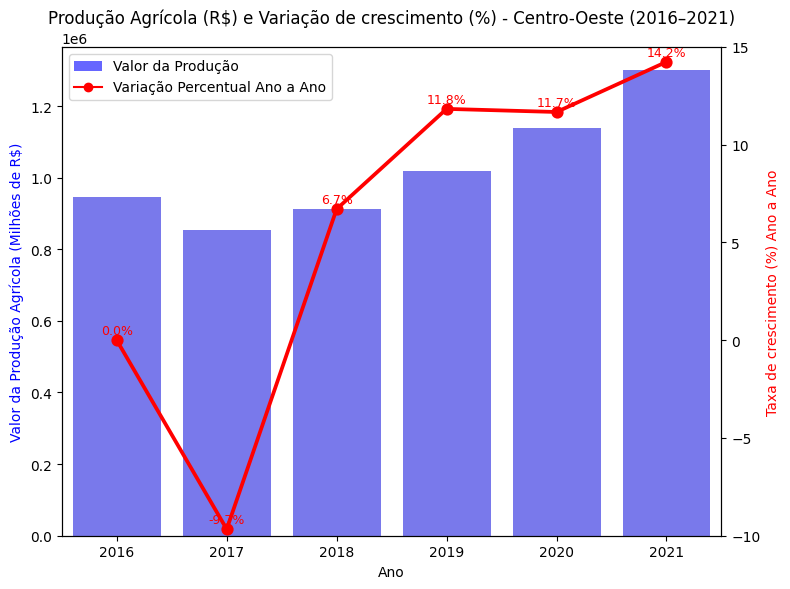

[0, -9.665207643630184, 6.711040733097369, 11.834911826460512, 11.67510199434897, 14.239865013314116]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste.groupby("Ano")["VlProducaoAgricola"].sum().reset_index()


valores = list(dados_Centro_Oeste["VlProducaoAgricola"])
diferencas = [0]

for i in range(1, len(valores)):
    x = (((valores[i] - valores[i - 1]) / valores[i - 1]) * 100)
    diferencas.append(x)

dados_Centro_Oeste["DiferencaAnoAnterior"] = diferencas


fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=dados_Centro_Oeste, x="Ano", y="VlProducaoAgricola", color="blue", alpha=0.6, ax=ax1)
ax1.set_ylabel("Valor da Produção Agrícola (Milhões de R$)", color= "blue")

ax2 = ax1.twinx()

sns.pointplot(data=dados_Centro_Oeste, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax2)
ax2.set_ylabel("Taxa de crescimento (%) Ano a Ano", color='red')
ax2.set_ylim(-10, 15)

for i, valor in enumerate(dados_Centro_Oeste["DiferencaAnoAnterior"]):
    ax2.text(i, valor + 0.3, f'{valor:.1f}%', color='red', ha='center', fontsize=9)

plt.title("Produção Agrícola (R$) e Variação de crescimento (%) - Centro-Oeste (2016–2021)")
ax1.set_xlabel("Ano")

legend_elements = [
    Patch(facecolor='blue', alpha=0.6, label='Valor da Produção'),
    Line2D([0], [0], marker='o', color='red', label='Variação Percentual Ano a Ano')
]
ax1.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

print(diferencas)

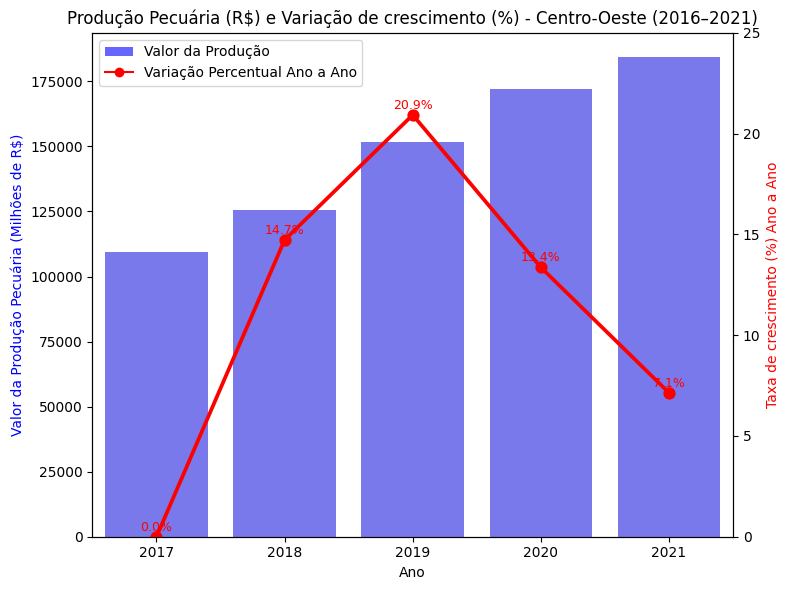

[0, 14.726840855106888, 20.92689918776875, 13.360990385881733, 7.139122857972698]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste.groupby("Ano")["VlProducaoPecuaria"].sum().reset_index()


valores = list(dados_Centro_Oeste["VlProducaoPecuaria"])
diferencas = [0]

for i in range(1, len(valores)):
    x = (((valores[i] - valores[i - 1]) / valores[i - 1]) * 100)
    diferencas.append(x)

dados_Centro_Oeste["DiferencaAnoAnterior"] = diferencas


fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=dados_Centro_Oeste, x="Ano", y="VlProducaoPecuaria", color="blue", alpha=0.6, ax=ax1)
ax1.set_ylabel("Valor da Produção Pecuária (Milhões de R$)", color= "blue")

ax2 = ax1.twinx()

sns.pointplot(data=dados_Centro_Oeste, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax2)
ax2.set_ylabel("Taxa de crescimento (%) Ano a Ano", color='red')
ax2.set_ylim(0, 25)

for i, valor in enumerate(dados_Centro_Oeste["DiferencaAnoAnterior"]):
    ax2.text(i, valor + 0.3, f'{valor:.1f}%', color='red', ha='center', fontsize=9)

plt.title("Produção Pecuária (R$) e Variação de crescimento (%) - Centro-Oeste (2016–2021)")
ax1.set_xlabel("Ano")

legend_elements = [
    Patch(facecolor='blue', alpha=0.6, label='Valor da Produção'),
    Line2D([0], [0], marker='o', color='red', label='Variação Percentual Ano a Ano')
]
ax1.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

print(diferencas)

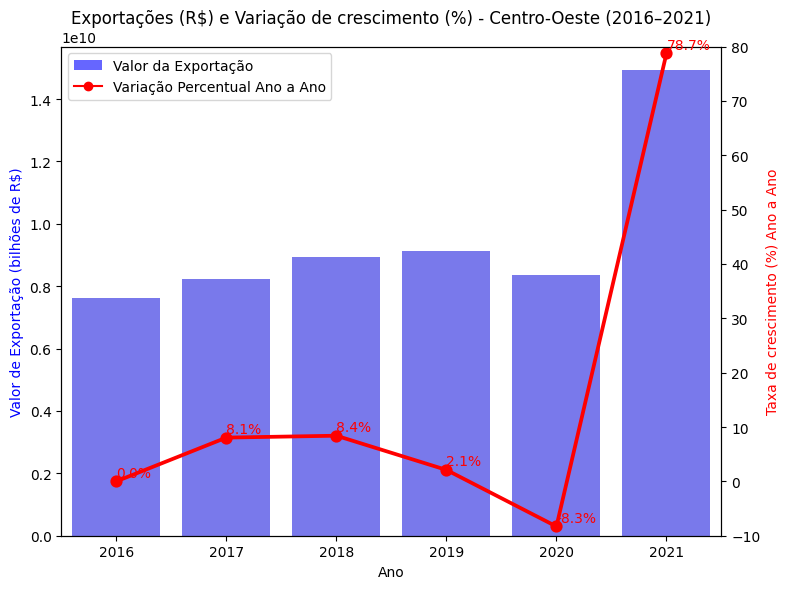

[0, 8.051565731622029, 8.399624485243722, 2.1079116080279054, -8.297795232853746, 78.72358644620512]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]
dados_Centro_Oeste = dados_Centro_Oeste.groupby("Ano")["Exportacoes_US$"].sum().reset_index()


valores = list(dados_Centro_Oeste["Exportacoes_US$"])
diferencas = [0]

for i in range(1, len(valores)):
    x = (((valores[i] - valores[i - 1]) / valores[i - 1]) * 100)
    diferencas.append(x)

dados_Centro_Oeste["DiferencaAnoAnterior"] = diferencas

#Grafico

fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=dados_Centro_Oeste, x="Ano", y="Exportacoes_US$", color="blue", alpha=0.6, ax=ax1)
ax1.set_ylabel("Valor de Exportação (bilhões de R$)", color='blue')

ax2 = ax1.twinx()

#dados_Centro_Oeste= dados_Centro_Oeste.drop(dados_Centro_Oeste[(dados_Centro_Oeste["Ano"] == 2016)].index)

sns.pointplot(data=dados_Centro_Oeste, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax2)
ax2.set_ylabel("Taxa de crescimento (%) Ano a Ano", color='red')
ax2.set_ylim(-10, 80)

for i, valor in enumerate(dados_Centro_Oeste["DiferencaAnoAnterior"]):
    ax2.text(i, valor + 0.3, f'{valor:.1f}%', color='red', va='bottom', fontsize=10)

plt.title("Exportações (R$) e Variação de crescimento (%) - Centro-Oeste (2016–2021)")
ax1.set_xlabel("Ano")

legend_elements = [
    Patch(facecolor='blue', alpha=0.6, label='Valor da Exportação'),
    Line2D([0], [0], marker='o', color='red', label='Variação Percentual Ano a Ano')
]
ax1.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

print(diferencas)

[0, 0.23127489196826992, 2.2994372559501426, -0.49435402305808407, 3.507741456929958]


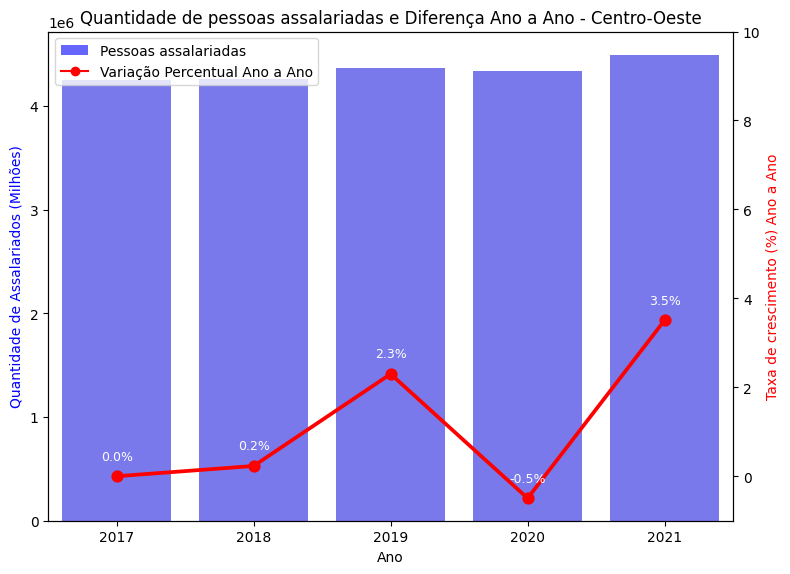

[0, 0.23127489196826992, 2.2994372559501426, -0.49435402305808407, 3.507741456929958]


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

dados_Centro_Oeste = dados[dados["Regiao"] == "Centro-Oeste"]

dados_Centro_Oeste = dados_Centro_Oeste.groupby("Ano")["PessoalAssalariado"].sum().reset_index()


valores = list(dados_Centro_Oeste["PessoalAssalariado"])
diferencas = [0]

for i in range(1, len(valores)):
    x = (((valores[i] - valores[i - 1]) / valores[i - 1]) * 100)
    diferencas.append(x)

dados_Centro_Oeste["DiferencaAnoAnterior"] = diferencas


fig, ax1 = plt.subplots(figsize=(8, 6))

sns.barplot(data=dados_Centro_Oeste, x="Ano", y="PessoalAssalariado", color="blue", alpha=0.6, ax=ax1)
ax1.set_ylabel("Quantidade de Assalariados (Milhões)", color="blue")

ax2 = ax1.twinx()

#dados_Centro_Oeste= dados_Centro_Oeste.drop(dados_Centro_Oeste[(dados_Centro_Oeste["Ano"] == 2016)].index)

sns.pointplot(data=dados_Centro_Oeste, x="Ano", y="DiferencaAnoAnterior", color="red", ax=ax2)
ax2.set_ylabel("Taxa de crescimento (%) Ano a Ano", color='red')
ax2.set_ylim(-1, 10)

for i, valor in enumerate(dados_Centro_Oeste["DiferencaAnoAnterior"]):
    ax2.text(i, valor + 0.3, f'{valor:.1f}%', color='white', ha='center', va='bottom', fontsize=9)

plt.title("Quantidade de pessoas assalariadas e Diferença Ano a Ano - Centro-Oeste")
ax1.set_xlabel("Ano")

legend_elements = [
    Patch(facecolor='blue', alpha=0.6, label='Pessoas assalariadas'),
    Line2D([0], [0], marker='o', color='red', label='Variação Percentual Ano a Ano')
]
ax1.legend(handles=legend_elements, loc='upper left')

plt.tight_layout()
plt.show()

print(diferencas)

RESULTADOS E CONCLUSÃO:

No primeiro gráfico, observou-se um crescimento contínuo da produção agrícola na região, com um aumento significativo entre os anos de 2018 e 2019 (11,8%) e entre 2020 e 2021 (14,2%).

O segundo gráfico, que apresenta os dados da produção pecuária, também revela um crescimento constante dessa atividade, com um pico de 20,9% em 2019, seguido de uma desaceleração nos anos subsequentes.

No terceiro gráfico, referente às exportações, foi possível identificar uma leve queda entre 2018 e 2020. No entanto, entre 2020 e 2021, houve um grande aumento, com um salto de quase 80%.

Por fim, o quarto gráfico mostra que a quantidade de pessoas assalariadas não apresentou mudanças significativas durante o período analisado, com o maior aumento ocorrendo entre 2016 e 2017.

Em análise geral, os dados sugerem que, apesar do crescimento constante da produção agrícola e pecuária, bem como do considerável aumento nas exportações em 2021, esses fatores não tiveram um impacto relevante na empregabilidade da região. O número de pessoas assalariadas permaneceu praticamente estável ao longo do período, com poucas alterações significativas.





# 🦠 **Análise do impacto da COVID-19 no crescimento do pessoal assalariado**

Este tópico apresenta a análise do impacto da pandemia de Covid-19 no crescimento do pessoal assalariado em cidades brasileiras classificadas como turísticas e não turísticas.

Como é sabido, a pandemia da COVID-19 impactou drasticamente diversos setores econômicos, sendo o turismo um dos mais afetados em todo o mundo. No Brasil, onde muitas cidades têm o turismo como atividade econômica central, entender como a crise sanitária influenciou o mercado de trabalho é de grande importância. A análise da variação do pessoal assalariado nas cidades turísticas permite avaliar o real impacto da pandemia sobre o emprego formal  e direcionar ações estratégicas para fortalecer a economia local no cenário pós-pandêmico.

Nesta análise, foram utilizadas informações sobre o número de trabalhadores assalariados em municípios brasileiros, sendo que a classificação das cidades mais turísticas foi baseada no levantamento disponível no site do Ministério do Turismo(2).

Os dados foram agrupados por ano, e a partir deles foi calculada a taxa de crescimento ano a ano do pessoal assalariado, expressando a variação percentual em relação ao ano anterior.

Com essas informações, elaborou-se um gráfico de linha comparativo:

- A linha verde representa o crescimento nas cidades turísticas.

- A linha azul representa o crescimento nas cidades não turísticas.

Cada ponto no gráfico mostra a taxa de crescimento anual, permitindo a comparação da evolução entre os dois tipos de cidade ao longo do tempo, especialmente no período crítico da pandemia.

A linha preta horizontal no valor de 0% foi adicionada para facilitar a identificação de anos de crescimento e anos de retração.

O objetivo é analisar como a pandemia afetou de maneira distinta o mercado de trabalho nas cidades que dependem do turismo, em comparação às demais.

**Referências:**

 2- Levantamento aponta tendência de crescimento na busca por viagens no segundo semestre de 2024. Disponível em: <https://www.gov.br/turismo/pt-br/assuntos/noticias/levantamento-aponta-tendencia-de-crescimento-na-busca-por-viagens-no-segundo-semestre-de-2024>. Acesso em: 26 abr. 2025.


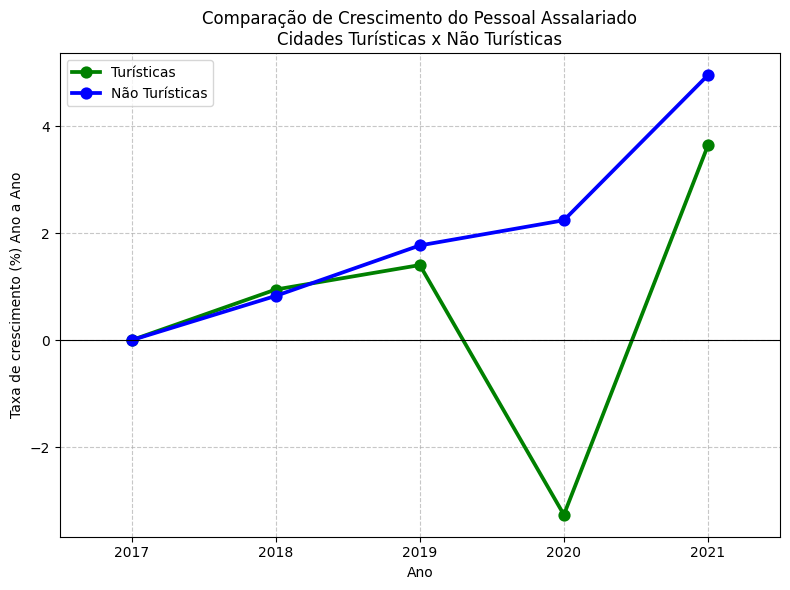

    Ano  PessoalAssalariado  DiferencaAnoAnterior
0  2017            12776113              0.000000
1  2018            12897072              0.946759
2  2019            13078124              1.403823
3  2020            12651116             -3.265055
4  2021            13111924              3.642430
    Ano  PessoalAssalariado  DiferencaAnoAnterior
0  2017            32288753              0.000000
1  2018            32555943              0.827502
2  2019            33132527              1.771056
3  2020            33875347              2.241966
4  2021            35554168              4.955878


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

cidades_turisticas = [
    "Rio de Janeiro", "Maceió", "São Paulo", "Porto de Galinhas",
    "Porto Seguro", "Gramado", "Natal", "Fortaleza",
    "Campos do Jordão", "Salvador", "Maragogi", "Foz do Iguaçu",
    "João Pessoa", "Recife", "Caldas Novas", "Florianópolis", "Olímpia",
    "Balneário Camboriú", "Ilhéus", "Curitiba"
]

dados = dados[ (dados["Ano"] == 2017) | (dados["Ano"] == 2018) | (dados["Ano"] == 2019) | (dados["Ano"] == 2020) | (dados["Ano"] == 2021)]

dados_turisticos = dados[dados["Municipio"].isin(cidades_turisticas)]
dados_normais = dados[~dados["Municipio"].isin(cidades_turisticas)]

#turísticos
dados_turisticos = dados_turisticos.groupby("Ano")["PessoalAssalariado"].sum().reset_index()

#não Turísticos
dados_normais = dados_normais.groupby("Ano")["PessoalAssalariado"].sum().reset_index()

valores_turisticos = list(dados_turisticos["PessoalAssalariado"])
diferencas_turisticos = [0]

for i in range(1, len(valores_turisticos)):
    x = (((valores_turisticos[i] - valores_turisticos[i - 1]) / valores_turisticos[i - 1]) * 100)
    diferencas_turisticos.append(x)


dados_turisticos["DiferencaAnoAnterior"] = diferencas_turisticos


valores_normais = list(dados_normais["PessoalAssalariado"])
diferencas_normais = [0]

for i in range(1, len(valores_normais)):
    x = (((valores_normais[i] - valores_normais[i - 1]) / valores_normais[i - 1]) * 100)
    diferencas_normais.append(x)

dados_normais["DiferencaAnoAnterior"] = diferencas_normais



fig, ax1 = plt.subplots(figsize=(8, 6))

sns.pointplot(data=dados_turisticos, x="Ano", y="DiferencaAnoAnterior", color="green", ax=ax1, label="Turísticas")
sns.pointplot(data=dados_normais, x="Ano", y="DiferencaAnoAnterior", color="blue", ax=ax1, label="Não Turísticas")

ax1.set_ylabel("Taxa de crescimento (%) Ano a Ano")
ax1.set_title("Comparação de Crescimento do Pessoal Assalariado\nCidades Turísticas x Não Turísticas")
ax1.axhline(0, color="black", linewidth=0.8)
ax1.grid(True, linestyle="--", alpha=0.7)
legend_elements = [
    Patch(facecolor='blue', alpha=0.6,),
    Line2D([0], [0], marker='o', color='green',)
]
plt.tight_layout()
plt.show()

print(dados_turisticos)
print(dados_normais)

RESULTADOS E CONCLUSÃO:

De 2017 a 2019, tanto cidades turísticas quanto não turísticas apresentaram crescimento contínuo do pessoal assalariado, com taxas variando entre 0,8% e 1,8% ao ano.

Em 2020, com a chegada da pandemia, observou-se uma forte queda nas cidades turísticas, que registraram um crescimento negativo de aproximadamente -3%. Esse comportamento nos mostra que a quantidade de pessoas assalaridas diminuiu, provavelmente refletindo os esforços que os governos de estados e municípios de tais regiões turísticas tiveram para que a população não sofresse tanto diante o impacto da pandemia naquele ano. Muitas cidades e estados forneceram ajuda financeira para a população no geral, para os donos de comercios etc.

Enquanto isso, as cidades não turísticas mantiveram um crescimento positivo no mesmo ano, em torno de 2,1%, indicando que talvez tais populações receberam menos auxílios governamentais.

Em 2021, os dados mostram um crescimento para ambos os grupos: o crescimento voltou a ser positivo tanto para as cidades turísticas (3,8%) quanto para as não turísticas (4,8%), sinalizando o real impacto da pandemia.

Em análise geral, os dados sugerem que as populações das cidades turísticas podem ter sido mais bem auxiliadas durante o período da pandemia